In [ ]:
# 뇌종양판별 Brain Tumor Classification (MRI)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import shutil
import os

try:
  dataset_path = '/content/gdrive/My Drive/Colab Notebooks/'
  shutil.copy(os.path.join(dataset_path, 'brain_tumor.zip',),'/content')

except Exception as err:
  print(str(err))


In [4]:
import os

ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'brain_tumor')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

In [5]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):
  shutil.rmtree(DATA_ROOT_DIR)
  print(DATA_ROOT_DIR + 'is removed !!!')

In [6]:
import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'brain_tumor.zip'), 'r') as target_file:
  target_file.extractall(DATA_ROOT_DIR)

In [ ]:
#brain_tumor/Training 확인

In [7]:
import os

#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#========================================================
# test 정답 및 전체 데이터 개수 확인
#========================================================

test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:

    print('test label : ', label_name, ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
train label :  meningioma_tumor  =>  822
train label :  glioma_tumor  =>  826
train label :  no_tumor  =>  395
train label :  pituitary_tumor  =>  827
['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
test label :  meningioma_tumor  =>  115
test label :  glioma_tumor  =>  100
test label :  no_tumor  =>  105
test label :  pituitary_tumor  =>  74


In [8]:
# Testing 디렉토리 모든 파일을 Training 동일 디렉토리로 move

test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:  # Testing 디렉토리 각각의 label 에서 실행

    test_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    test_file_list = os.listdir(test_path)

    train_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    moved_num = 0

    for test_image_file in test_file_list:  # Testing 모든 data를 Training 디렉토리로 이동

        shutil.move(os.path.join(test_path, test_image_file),
                    os.path.join(train_path, test_image_file))

        moved_num = moved_num + 1

    print(str(moved_num) + ' is moved into ' + label_name + ' (Testing => Training)')

['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
115 is moved into meningioma_tumor (Testing => Training)
100 is moved into glioma_tumor (Testing => Training)
105 is moved into no_tumor (Testing => Training)
74 is moved into pituitary_tumor (Testing => Training)


In [9]:
# move 완료된 train 전체 데이터 개수 확인

#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
train label :  meningioma_tumor  =>  937
train label :  glioma_tumor  =>  926
train label :  no_tumor  =>  396
train label :  pituitary_tumor  =>  901


In [10]:
# move 비율 설정

import os
import shutil
import random

MOVE_RATIO = 0.2  # train : test = 80 : 20, 즉 train 데이터 20% 데이터를 test 데이터로 사용

# 파일 move train_data_dir => test_data_dir

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

for label_name in label_name_list:

    # 파일 move 하기 위한 src_dir_path, dst_dir_path 설정
    #=========================================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)
    #=========================================================

    train_data_file_list = os.listdir(src_dir_path)

    random.shuffle(train_data_file_list)                # data shuffle

    split_num = int(MOVE_RATIO*len(train_data_file_list))

    test_data_file_list = train_data_file_list[0:split_num]    # extract test data from train data

    for test_data_file in test_data_file_list:

        try:
            shutil.move(os.path.join(src_dir_path, test_data_file),
                        os.path.join(dst_dir_path, test_data_file))
        except Exception as err:
            print(str(err))

In [11]:
# train data, test data 개수 확인

import os

#==============================================================================
# train 파일 개수 확인
#==============================================================================

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)

    print('train label : ' + label_name + ' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================


#==============================================================================
# test 파일 개수 확인
#==============================================================================

label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(label_name_list)

for label_name in label_name_list:

    label_dir = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    print('test label : ' + label_name + ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#==============================================================================

['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
train label : meningioma_tumor =>  750
train label : glioma_tumor =>  741
train label : no_tumor =>  317
train label : pituitary_tumor =>  721
['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']
test label : meningioma_tumor =>  187
test label : glioma_tumor =>  185
test label : no_tumor =>  79
test label : pituitary_tumor =>  180


In [ ]:
# 이미지 shape 설정
# ImageDataGenerator 이용하여 데이터 불러옴#

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                color_mode='rgb', class_mode='sparse',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))



test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size=32,
                                              color_mode='rgb', class_mode='sparse',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 2529 images belonging to 4 classes.
Found 631 images belonging to 4 classes.


In [15]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
4


In [16]:
# 32 개의 데이터와 정답 가져와서 16개 출력

IMG_NUMS = 16

image_data, label_data = train_generator.next()

data = image_data[:IMG_NUMS]

label = label_data[:IMG_NUMS]

print(data.shape, label.shape)
print(label)

(16, 224, 224, 3) (16,)
[3. 0. 1. 0. 1. 1. 1. 1. 3. 3. 0. 0. 2. 0. 0. 3.]


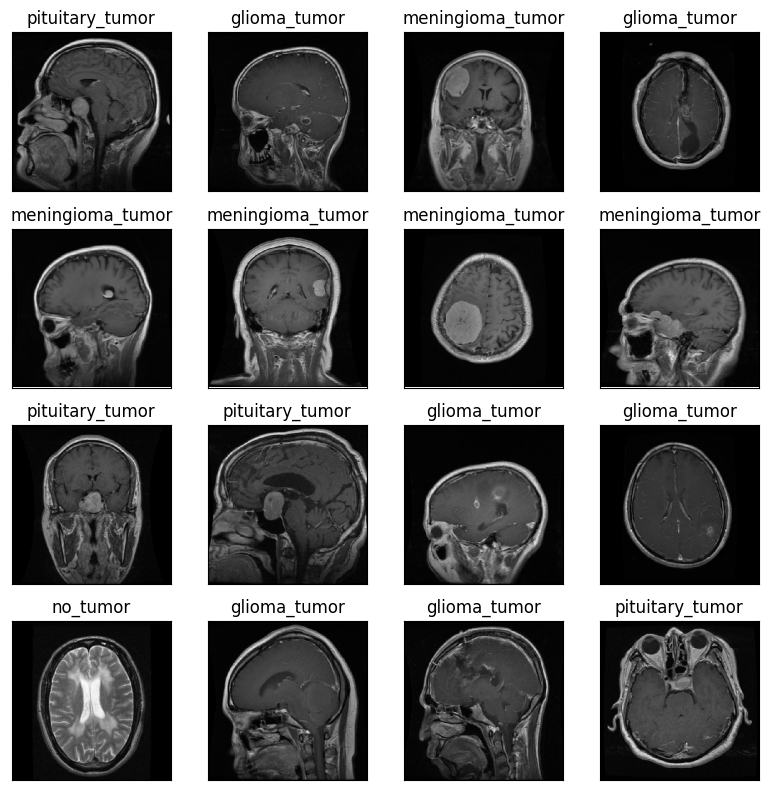

In [17]:
import matplotlib.pyplot as plt

class_dict = { 0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

plt.figure(figsize=(8,8))

for i in range(len(label)):

    plt.subplot(4, 4, i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(data[i])

plt.tight_layout()
plt.show()

In [18]:
# Fine Tuning 위한 pre-trained model 정의 및 모델 구축

class_nums = train_generator.num_classes  # 정답개수

pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums, activation='softmax'))

model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                         

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist = model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[earlystopping])

Epoch 1/50
80/80 [==============================] - 49s 263ms/step - loss: 1.6356 - acc: 0.3669 - val_loss: 1.0953 - val_acc: 0.4945
Epoch 2/50
80/80 [==============================] - 17s 216ms/step - loss: 1.1405 - acc: 0.5299 - val_loss: 0.9269 - val_acc: 0.6149
Epoch 3/50
80/80 [==============================] - 17s 216ms/step - loss: 0.8834 - acc: 0.6331 - val_loss: 0.7776 - val_acc: 0.6957
Epoch 4/50
80/80 [==============================] - 20s 248ms/step - loss: 0.7341 - acc: 0.7026 - val_loss: 0.6816 - val_acc: 0.7338
Epoch 5/50
80/80 [==============================] - 19s 236ms/step - loss: 0.6139 - acc: 0.7608 - val_loss: 0.5526 - val_acc: 0.7813
Epoch 6/50
80/80 [==============================] - 18s 219ms/step - loss: 0.5546 - acc: 0.7853 - val_loss: 0.4931 - val_acc: 0.8082
Epoch 7/50
80/80 [==============================] - 20s 248ms/step - loss: 0.4968 - acc: 0.8161 - val_loss: 0.4367 - val_acc: 0.8288
Epoch 8/50
80/80 [==============================] - 18s 220ms/step - 

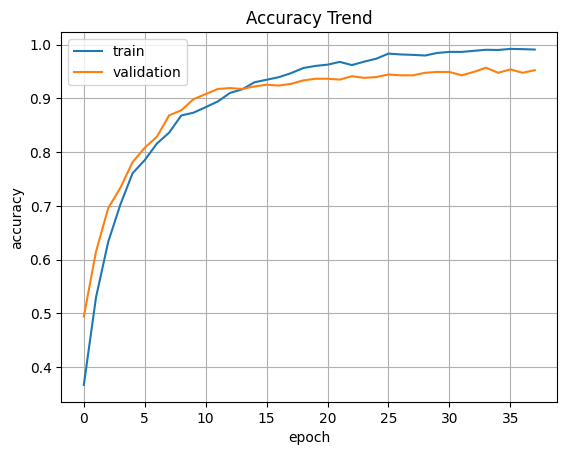

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

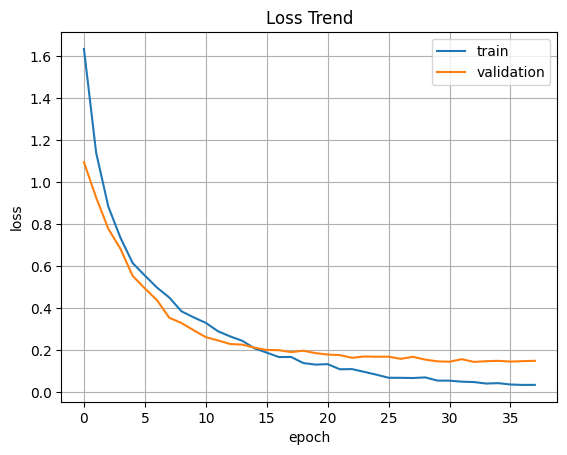

In [22]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
model.evaluate(test_generator)

20/20 [==============================] - 3s 152ms/step - loss: 0.1478 - acc: 0.9525


[0.1477992683649063, 0.9524564146995544]